In [242]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import Image, Math
import gif
import numpy as np
import pandas as pd
from qutip import *
from qutip.piqs import *
from qutip.cy.piqs import j_min, j_vals, m_vals
import warnings
warnings.filterwarnings('ignore')
from itertools import product
import os
from fractions import Fraction

# Functions created in 04 tutorial

from libs.helper_05_tutorial import *

def prettify_states(states, mm_list=None):
    pretty_states = np.zeros([states[0].shape[0],len(states)], dtype="object")
    
    for j, state in enumerate(states):
        x = []
        for i, val in enumerate(state):
            pretty_states[i,j] = f"{val[0,0]:.1f}"
    if (mm_list == None):
        df = pd.DataFrame(data=pretty_states)
    else:
        df = pd.DataFrame(data=pretty_states, index=mm_list)
            
    return df

As soon as we start adding more than one TSS things get quite complicated. In order to give us an intuition for how such systems behave, we will take inspiration from Tutorials 1 and 2.


Let's start simple and look at 2 TSS. We can describe this system by the different possible combinations of the higher (+) and lower (-) energy states of the individual TSS namely:
- |+,+>
- |+,->
- |-,+>
- |-,->

So, 2 TSS is actually a 4 state system. Mathematically these 4 states can be represented as vectors of length 4 using the following basis:

$$
|+, +> = \begin{bmatrix}
 1   \\
 0   \\
 0   \\
 0   \\
 \end{bmatrix}, 
|+, -> = \begin{bmatrix}
 0   \\
 1   \\
 0   \\
 0   \\
\end{bmatrix}, 
|-, +> = \begin{bmatrix}
 0   \\
 0   \\
 1   \\
 0   \\
\end{bmatrix}, 
|-, -> = \begin{bmatrix}
 0   \\
 0   \\
 0   \\
 1   \\
\end{bmatrix}
$$

How to we create these states in QuTiP?

In [Tutorial 3](https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/03-a-two-state-system-in-a-quantised-field.ipynb#3.5---Describing-coupled-systems-in-QuTiP) we learnt to describe such states| by using the tensor product. For example, we would create the |+,-> state by doing:

In [288]:
pm = tensor(basis(2,0), basis(2,1))
pm

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

and we can keep track of which basis states corresponds to which row by using the `product` function that we introduced in the previous tutorial. Specifically:

In [281]:
possible_ms = ["+","-"]
mm_list = [m for m in product(possible_ms, possible_ms)]
mm_list

[('+', '+'), ('+', '-'), ('-', '+'), ('-', '-')]

So, the row number 1 of the state vector refers to the basis state:

In [283]:
mm_list[1]

('+', '-')

How does such a system behave?

## TSS Recap

We have previously looked at a TSS whose states are allowed to couple to each other with strength $A$. This coupling resulted in a splitting of the states of constant energy. When we perturbed the energy of those states by an amount $\pm \delta$ we found (in [tutorial 02](https://github.com/project-ida/two-state-quantum-systems/blob/master/02-perturbing-a-two-state-system.ipynb)) that a natural way to represent the Hamiltonian is

$$
H = \begin{bmatrix}
 A  &  \delta  \\
 \delta  &  -A  \\
\end{bmatrix} = A\sigma_z +\delta \sigma_x
$$

The base states being used to represent this system are the stationary states of the unperturbed system ($\delta=0$) that we describe by:

$$
|+> = \begin{bmatrix}
 1   \\
 0   \\
 \end{bmatrix}, 
|-> = \begin{bmatrix}
 0   \\
 1   \\
\end{bmatrix}
$$

where |+>, |-> correspond to the higher and lower energy states respectively. 

You may recall that there are mathematical similarities between a TSS and a spin $1/2$ particle. When considering many TSS, we will find it invaluable to refer to well known spin results, such as conservation of angular momentum, to help us solve problems. In light of this, we will introduce a factor of $1/2$ into the Hamiltonian:

$$
H = \frac{1}{2}A\sigma_z +\frac{1}{2}\delta \sigma_x
$$

so that we can rewrite the Hamiltonian in terms of spin operators, (denoted by $S$), for a [spin $1/2$ particle](https://en.wikipedia.org/wiki/Spin-%C2%BD#Observables), i.e.

$$
H = A S_{z} + \delta S_{x}
$$


QuTiP has a nice function to generate the J operators for any given number of TSS.

## Independent TSS


A natural starting point for the Hamiltonian of $N$ independent TSS each interacting with a perturbing "field" $\delta$ is:

$$
H = A \overset{N}{\underset{n=1}{\Sigma}} S_{n z} +  \delta \overset{N}{\underset{n=1}{\Sigma}} S_{n x} 
$$

Because spin represents angular momentum, the sum of $N$ spin operators above is mathematically the same as how one would create the [total angular momentum operators](https://www2.ph.ed.ac.uk/~ldeldebb/docs/QM/lect15.pdf) - denoted by $J$, e.g. $J_x = \overset{N}{\underset{n=1}{\Sigma}} S_{n x}$. The Hamiltonian can then be written more compactly as:

$$
H = A J_{z} +  \delta J_{x}
$$


QuTiP has a nice function, [`jspin`](http://qutip.org/docs/latest/apidoc/functions.html#qutip.piqs.jspin),  to generate the J operators for any given number of TSS (note, you must import [`qutip.piqs`](http://qutip.org/docs/latest/apidoc/functions.html#module-qutip.piqs) to use this)

In [284]:
# number of TSS
N = 2

In [476]:
J = jspin(N, basis="uncoupled")

Let's see how the $J_z$ operator acts on the |+,-> state we created earlier.

In [478]:
J[2]*tensor(basis(2,0), basis(2,0))

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [296]:
J[2]*pm

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]]

We get zero because $J_z$ is essentially a running total of the number of "spin ups" ($n_+$) and "spin downs" ($n_-$), weighted by a factor of half, i.e. $J_z = \frac{1}{2}(n_+-n_-)$. For |+, -> we have 1 up and 1 down and so we get zero.



We proceed as we have done several times by looking for the stationary states of the system. When the system is in one of these states it will remain there for all time. Such states are described by a single constant energy.

To find the states of constant energy, we'll follow what we did in Tutorial 2. Specifically, we will calculate the eigenvalues of the Hamiltonian (i.e the energies) and see how they depend on the the perturbation strength $\delta$.

Let's see what we find.

In [839]:
df = make_df_for_energy_scan("$\delta$/A", -4,4, 100, J[0].shape[0]) 

In [840]:
vec = np.zeros([J[0].shape[0], J[0].shape[0],100])

In [841]:
A=0.1

In [842]:
for i, row in df.iterrows():
    H = A*J[2] + row[ "$\delta$/A"]*A*J[0]
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals
    for j, ket in enumerate(ekets):
        s = np.transpose(ket)
        vec[j,:,i] = np.abs(s*np.conj(s))

In [843]:
bra_labels, ket_labels = make_braket_labels(mm_list)

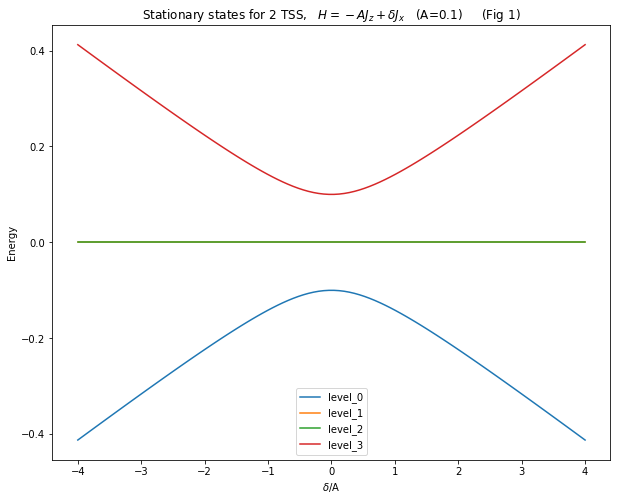

In [844]:
df.plot(x="$\delta$/A",figsize=(10,8),legend=True, 
        title="Stationary states for 2 TSS,   $H=-AJ_{z} + \delta J_{x}$   (A=0.1)     (Fig 1)");
plt.ylabel("Energy");

Superficially, Fig 1 resembles Fig 3 of [Tutorial 2](https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/02-perturbing-a-two-state-system.ipynb#2.1-Static-perturbation) in that we see an avoided crossing when there is no perturbation. 

What is most interesting is that there are 2 levels with the same energy (aka [degenerate](https://en.wikipedia.org/wiki/Degenerate_energy_levels) levels) whose value does not show any dependence on $\delta$. Let's explore what the eigenstates look like for the $\delta/A=4$ case (the last value calculated in the above loop).

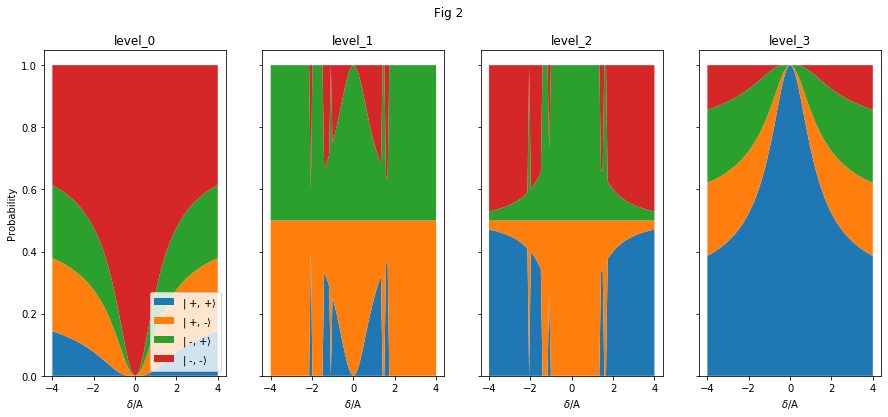

In [845]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,6), sharey=True)

for i in range(0,vec.shape[0]):
    axes[i].stackplot(df[ "$\delta$/A"], vec[i,:,:], labels=ket_labels);
    axes[i].set_xlabel("$\delta$/A")
    axes[i].set_title(f"level_{i}")
axes[0].set_ylabel("Probability")
axes[0].legend(loc='lower right')

fig.suptitle('Fig 2');

Fig 2 shows us how much of each basis state makes up each eigenstate (which corresponds to a particular energy level) as we change $\delta$. For example, level_0 with $\delta/A = -0.4$, is made up of:
- 40% |-,-> state (red)
- 20% |-,+> state (green)
- 25% |+,-> state (orange)
- 15% |+,+> state (blue).


We expect the eigenstates to change in a smooth way as we change $\delta$, but we can see that level_1 and level_2 show some spiky behaviour. This is due to the degenerate nature of the energy levels and the numerical methods used by QuTiP - the eigenstates can sometimes swap their order in the numpy array. We can fix this manually in the following way:

In [846]:
# Looks at level 1 and finds the indices where the state |+,+> (blue) has a non zero value i.e. the spiky points
ind = vec[1,0,:] > 0 

# swaps the eigenstates of level_1 and level_2 only at the spiky places
vec[1,:,ind], vec[2,:,ind] = vec[2,:,ind], vec[1,:,ind]

Now let's replot 

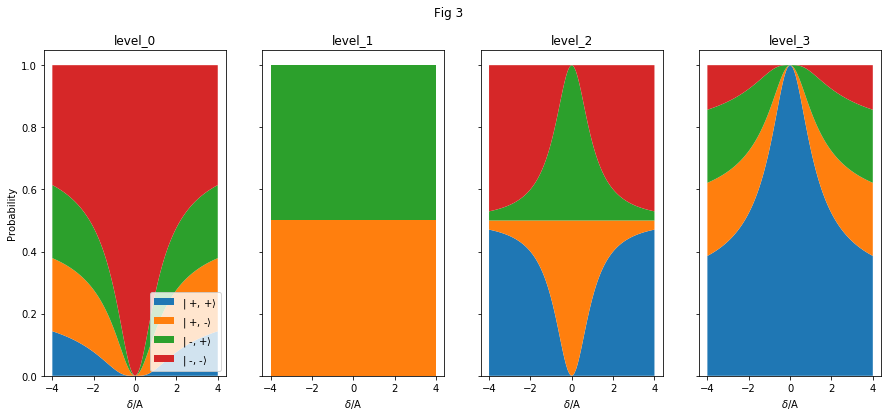

In [847]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,6), sharey=True)

for i in range(0,vec.shape[0]):
    axes[i].stackplot(df[ "$\delta$/A"], vec[i,:,:], labels=ket_labels);
    axes[i].set_xlabel("$\delta$/A")
    axes[i].set_title(f"level_{i}")
axes[0].set_ylabel("Probability")

axes[0].legend(loc='lower right')

fig.suptitle('Fig 3');

Much better. There is a lot to say about Fig 3:
1. As $\delta \rightarrow 0$, level_0 and level_3 behave as one would expect, namely the eigenstate corresponding to lowest energy level_0 becomes |-,->, and for the highest energy level_3 it's |+,+>
2. The eigenstate corresponding to level_1 has no dependency on the perturbation $\delta$
3. As $\delta \rightarrow 0$, the level_2 eigenstate approaches the same as level_1 (within a phase factor)

In order to solve the mystery of indifference of level_1 to $\delta$ we need to first understand another puzzle. Let's look at the numerical values of the eigenstates for a very small $\delta=0.001$

In [860]:
delta = 0.001
H = A*J[2] + delta*J[0]
evals, ekets = H.eigenstates()

In [861]:
prettify_states(ekets, mm_list)

,0,1,2,3
"(+, +)",0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j
"(+, -)",-0.0+0.0j,-0.7+0.0j,-0.7+0.0j,0.0+0.0j
"(-, +)",-0.0+0.0j,-0.7+0.0j,0.7+0.0j,0.0+0.0j
"(-, -)",1.0+0.0j,-0.0+0.0j,0.0+0.0j,0.0+0.0j


We can see that levels 1 and 2 are "in phase" and "out of phase" mixtures of |+,-> and |-,+>. This kind of combination of basis states is often referred to as an [entangled state](https://en.wikipedia.org/wiki/Quantum_entanglement#Pure_states).

When we compare this to the unperturbed case, i.e. $\delta=0$, we see a large difference:

In [862]:
H0 =  A*J[2]
evals0, ekets0 = H0.eigenstates()

In [863]:
prettify_states(ekets0, mm_list)

,0,1,2,3
"(+, +)",0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j
"(+, -)",0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0+0.0j
"(-, +)",0.0+0.0j,0.0+0.0j,1.0+0.0j,0.0+0.0j
"(-, -)",1.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j


The reason for the discontinuity in the eigenstates for very small $\delta$ vs zero $\delta$ is because both basis states are equally valid ways to represent the states of constant energy.

But, there is clearly something important to understand about the basis made up of entangled states - even when we have a tiny perturbation this is the apparently the appropriate basis for describing the stationary states.

What makes it special? It has to do with angular momentum.

## Angular momentum

In [124]:
J2 = J[0]*J[0] + J[1]*J[1] + J[2]*J[2]
J2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[2. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 2.]]

In [167]:
evalsJ, eketsJ = J2.eigenstates()

In [115]:
evalsJ

array([1.11022302e-15, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00])

In [117]:
prettify_states(eketsJ, mm_list)

,0,1,2,3
"(+, +)",0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0+0.0j
"(+, -)",0.7+0.0j,0.0+0.0j,0.7+0.0j,0.0+0.0j
"(-, +)",-0.7+0.0j,0.0+0.0j,0.7+0.0j,0.0+0.0j
"(-, -)",0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j


In [193]:
J = jspin(2)

In [274]:
jm_list = []
js = j_vals(2)[::-1]
for j in js:
    ms = m_vals(j)[::-1]
    for m in ms:
        jm_list.append((j,m))      
print(jm_list)

[(1.0, 1.0), (1.0, 0.0), (1.0, -1.0), (0.0, -0.0)]


In [205]:

delta = 0.001
A = 0.1

H0 = -A*J[2]


evals, ekets = H0.eigenstates()

H1 =  delta*J[0]


H_list = [H0,[H1,'cos(w*t)']]

times = np.linspace(0.0, 20000.0, 1000) 

psi0 = ekets[0]

result = sesolve(H_list, psi0, times, args={'w':A})

In [206]:
num_states = result.states[0].shape[0]
psi = np.zeros([num_states,times.size], dtype="complex128")
P = np.zeros([num_states,times.size], dtype="complex128")

for i, state in enumerate(result.states):
    transformed_state = state.transform(ekets)
    psi[:,i] = np.transpose(transformed_state)
    P[:,i] = np.abs(psi[:,i]*np.conj(psi[:,i]))

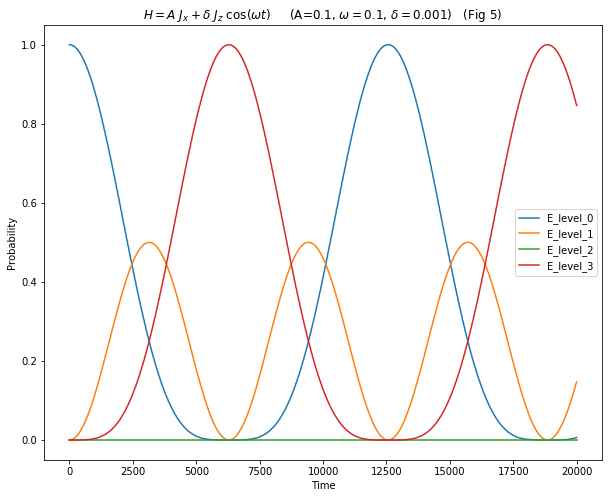

In [207]:
plt.figure(figsize=(10,8))
for i in range(0,P.shape[0]):
    plt.plot(times, P[i,:], label=f"E_level_{i}")
plt.ylabel("Probability")
plt.xlabel("Time")
plt.legend(loc="right")
plt.title("$H =A \ J_x + \delta \ J_z \  \cos (\omega t)$     (A=0.1, $\omega = 0.1$, $\delta=0.001$)   (Fig 5)")
plt.show();

In [275]:
prettify_states(ekets,jm_list)

,0,1,2,3
"(1.0, 1.0)",1.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
"(1.0, 0.0)",0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0+0.0j
"(1.0, -1.0)",0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j
"(0.0, -0.0)",0.0+0.0j,0.0+0.0j,1.0+0.0j,0.0+0.0j


In [276]:
J2 = J[0]*J[0] + J[1]*J[1] + J[2]*J[2]

In [277]:
commutator(H,J2)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [278]:
J2*basis(4,0)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[2.]
 [0.]
 [0.]
 [0.]]